#### Nicolas Ramos Samboni - Big Data 2021/2022
## Evaluación por pares Módulo 3: “Big Data y Geospatial Data Science”

<font size='3'> Para el modulo 3 de Big Data se realizara un analisis de un dataset haciendo uso de recursos python para poder responder preguntas de interes sobre el mismo. </br> Esto con el objetivo de entender y obtener conocimiento sobre el tema. </font>

<font size='4'> <ins> Contenido </ins> </font>
<ol>
<font size='4'> 
  <li>Getting to know the data</li>
  <li> What are the countries that launch the most satellites? </li>
  <li> Satellites Owners</li>
  <li> What are the satellites use for? </li>
  <li> Timeseries of launches </li>
  <li> Map of deploys </li>
  <li> Top satellites detail use </li>
  <li> Analysis of Launch Mass </li>
  <li> Which country launched the most lifetime reliable satellites </li>
  <li> Quantity of satellites by year and general uses </li>
</font>
</ol>

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import geopandas as gpd
from plotnine import *
import folium

## Getting to know the data
<p> El dataset de satelites actualmente en orbita terreste nos da informacion tecnica/general de cada uno de ellos </p>
<p> Nos proporciona datos numericos y cuanlitativos, podemos apreciar que la naturaleza del dataset es heterogenea y nuestra mejor opcion es generar un dataframe con panda para el analisis</p>

In [2]:
# get the data from csv 
satelites_data = pd.read_csv('satelliteDB.csv')

# make a dataframe out of it
df = pd.DataFrame(satelites_data)

# show the first 3 rows
df.head(3)

,Official Name of Satellite,Country/Organization of UN Registry,Operator/Owner,Country of Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of Geosynchronous Orbit (Degrees),...,Dry Mass (Kilograms),Power (Watts),Date of Launch,Expected Lifetime (Years),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
0,AAUSat-4,NR,University of Aalborg,Denmark,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,NaN,NaN,4/25/2016,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460.0
1,ABS-2,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.0,...,NaN,16000,2/6/2014,15,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508.0
2,ABS-2A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-75.0,...,NaN,NaN,6/15/2016,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588.0


In [3]:
# all the data is ready to work since it is in the correct type for operations
# the numerical data will be code into numerical when needed.
df.dtypes

Official Name of Satellite                      object
Country/Organization of UN Registry             object
Operator/Owner                                  object
Country of Operator/Owner                       object
Users                                           object
Purpose                                         object
Detailed Purpose                                object
Class of Orbit                                  object
Type of Orbit                                   object
Longitude of Geosynchronous Orbit (Degrees)    float64
Perigee (Kilometers)                           float64
Apogee (Kilometers)                            float64
Eccentricity                                   float64
Inclination (Degrees)                          float64
Period (Minutes)                                object
Launch Mass (Kilograms)                         object
Dry Mass (Kilograms)                            object
Power (Watts)                                   object
Date of La

In [4]:
# check for null values in all the columns
df.isnull().sum()

#in case of working with one of them, remove it for analysis

Official Name of Satellite                        0
Country/Organization of UN Registry               0
Operator/Owner                                    1
Country of Operator/Owner                         0
Users                                             1
Purpose                                           1
Detailed Purpose                               1051
Class of Orbit                                    1
Type of Orbit                                   521
Longitude of Geosynchronous Orbit (Degrees)      18
Perigee (Kilometers)                              1
Apogee (Kilometers)                               1
Eccentricity                                      1
Inclination (Degrees)                             1
Period (Minutes)                                  3
Launch Mass (Kilograms)                         103
Dry Mass (Kilograms)                            947
Power (Watts)                                   771
Date of Launch                                    4
Expected Lif

In [5]:
#Rename the columns to work easier with the dataset
colnames = ['Name','Country','Operator', 'OperatorCountry',
'Users','Purpose','PurposeDetail','OrbitClass','OrbitType','orbitLon_d',
'Perigee_Km','Apogee_Km','e','Inclination','Period','LaunchMass','DryMass','Power',
'Date','Lifetime','Contractor','ContractorCountry','LaunchSite','LaunchVehicle','COSPAR','NORAD']

data = pd.read_csv('satelliteDB.csv',names=colnames,header=0)
data.head(3).T 

,0,1,2
Name,AAUSat-4,ABS-2,ABS-2A
Country,NR,NR,NR
Operator,University of Aalborg,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.
OperatorCountry,Denmark,Multinational,Multinational
Users,Civil,Commercial,Commercial
Purpose,Earth Observation,Communications,Communications
PurposeDetail,Automatic Identification System (AIS),NaN,NaN
OrbitClass,LEO,GEO,GEO
OrbitType,Sun-Synchronous,NaN,NaN
orbitLon_d,0.0,75.0,-75.0


# Top 10 countries and the number of satellites launched

Uso del paquete seaborn para plotear los datos

/usr/local/Caskroom/miniconda/base/envs/bigdata/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0, 0.5, 'Number of satellites')

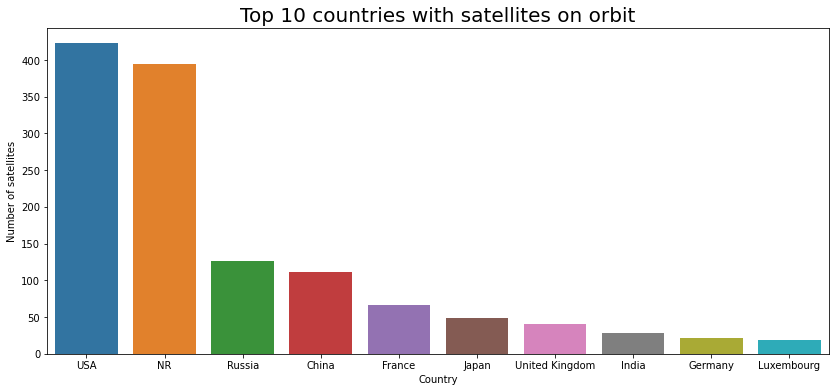

In [6]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(data['Country'], order = data.Country.value_counts().iloc[:10].index)

plt.title("Top 10 countries with satellites on orbit", fontdict = {'fontsize':20})
plt.ylabel("Number of satellites")

# To whom the satellites belong to?

/usr/local/Caskroom/miniconda/base/envs/bigdata/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0, 0.5, 'Number of satellites')

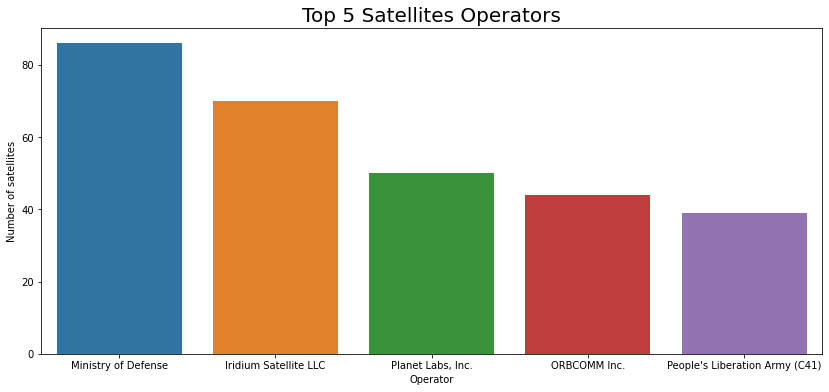

In [7]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(data['Operator'], order = data.Operator.value_counts().iloc[:5].index)

plt.title("Top 5 Satellites Operators", fontdict = {'fontsize':20})
plt.ylabel("Number of satellites")

# Most Uses of the satellites in orbit

<AxesSubplot:title={'center':'Most uses of Satellites'}, xlabel='Use', ylabel='Quantity'>

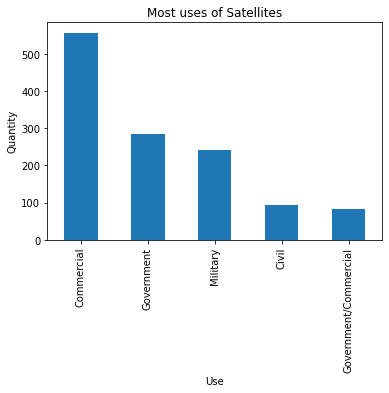

In [8]:
data['Users'].value_counts().head(5).plot(kind='bar',title='Most uses of Satellites',xlabel='Use',ylabel='Quantity')

# Timeline of Satellites launches

<AxesSubplot:title={'center':'Number of sats'}, xlabel='year of launch', ylabel='Number lauched'>

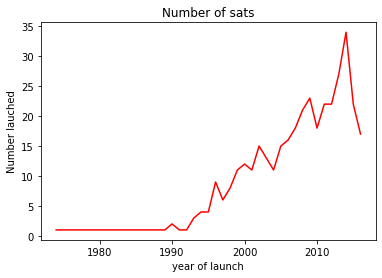

In [9]:
#we need to extract the year of the date included in the data
new_column = []
for i in data['Date']:
    time = pd.to_datetime(i).year
    new_column.append(time)
data['year of launch'] = new_column #now we have the year in a separate column

#group by year and then plot number of sats
group_byear = data.groupby('year of launch')
sat_year = group_byear.agg({'OperatorCountry':'nunique'}) #every country has its own counter of unique values
sat_year['OperatorCountry'].plot(kind='line',title='Number of sats',ylabel='Number lauched',color='r')

# Top launch sites

<p> Para representar en el mapa los datos necesitamos transformar el texto de ubicacion en coordenadas, para ellos geocodificamos. </br>
Este proceso es tardio </p>

In [10]:
# Extraer del dataframe original las ubicaciones
places = pd.DataFrame(df['Launch Site'].unique(),columns=['LaunchSite']).dropna()

geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")

# añadir al nuevo dataframe las ubicaciones geocodificadas
places['Geocode_Launch'] = places['LaunchSite'].apply(geolocator.geocode).dropna()
gcode = places['LaunchSite'].apply(geolocator.geocode).dropna()

In [15]:
mapa = folium.Map(min_lat=70,min_lon=-119.0,max_lat=70,max_lon=140, zoom_start=3, width=500, height=500)

#plotear todos los puntos
for index, row in gcode.iteritems():
    folium.Marker(location=(row.latitude,row.longitude)).add_to(mapa)
display(mapa)

# Top Satellite Use

Text(0, 0.5, 'Purpose')

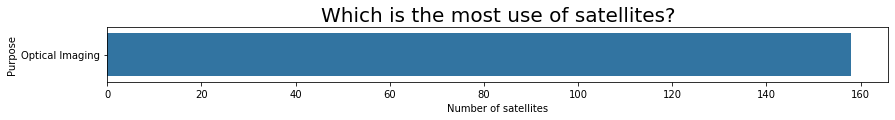

In [16]:
fig, ax = plt.subplots(figsize=(14,1))
sns.countplot(y = data['PurposeDetail'], order = data.PurposeDetail.value_counts().iloc[:1].index)

plt.title("Which is the most use of satellites?", fontdict = {'fontsize':20})
plt.xlabel("Number of satellites")
plt.ylabel("Purpose")

# Boxplot Mass of Launch

In [17]:
# we need to change the format in the data to be able to plot into boxplot representation
for i in data.index:
    if data.loc[i,'LaunchMass'] == '5,000+':
        data.loc[i,'LaunchMass'] = 5000
        
data.LaunchMass = pd.to_numeric(data.LaunchMass)

Text(0, 0.5, 'Mass')

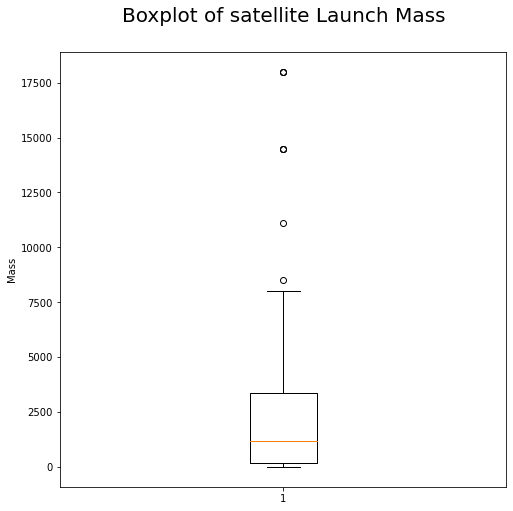

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
plt.boxplot(data[data['LaunchMass'].notnull()].LaunchMass)
plt.title("Boxplot of satellite Launch Mass", fontdict = {'fontsize':20}, pad = 30.0)
plt.ylabel("Mass")

# Boxplot Expected Lifetime per Country

In [19]:
# Formating string Lifetime data into flaot
# for each line we'll need to drop the elements that we dont need (all text, non numeric)
for i in data.index:
    if isinstance(data.loc[i,'Lifetime'], str):
        data.loc[i,'Lifetime'] = data.loc[i,'Lifetime'].strip(" yr.")
        data.loc[i,'Lifetime'] = data.loc[i,'Lifetime'].strip("yrs.")
        data.loc[i,'Lifetime'] = data.loc[i,'Lifetime'].strip(" trs,")
        data.loc[i,'Lifetime'] = data.loc[i,'Lifetime'].strip(" hrs.")
        # split when - is found and generate the mean of the time interval 
        if "-" in data.loc[i,'Lifetime']:
            data.loc[i,'Lifetime'] = (float(data.loc[i,'Lifetime'].split("-")[0]) + float(data.loc[i,'Lifetime'].split("-")[1])) / 2
            
data.Lifetime = pd.to_numeric(data.Lifetime)

Text(0, 0.5, 'Expected lifetime')

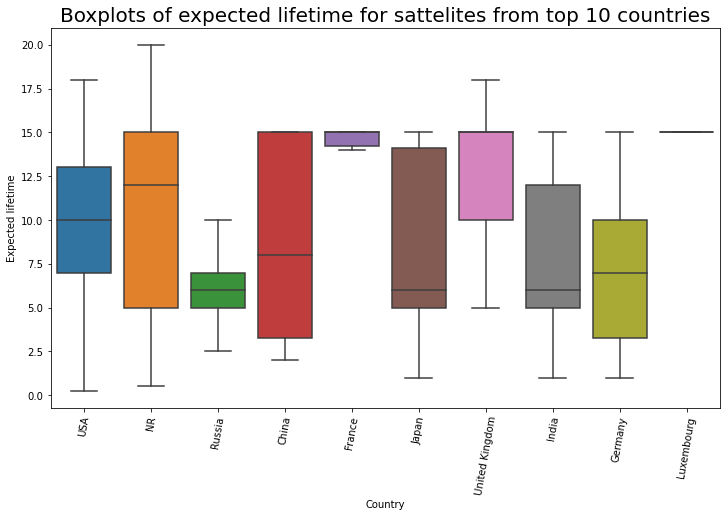

In [20]:
fig, ax = plt.subplots(figsize=(12,7))
topCountries = data.Country.value_counts().head(10).index.tolist()
sns.boxplot(x=data[data['Country'].isin(topCountries)].Country, y=data.Lifetime, order = topCountries, showfliers=False)
plt.xticks(rotation=80)
plt.title("Boxplots of expected lifetime for sattelites from top 10 countries",
          fontdict = {'fontsize':20})
plt.ylabel("Expected lifetime")

/usr/local/Caskroom/miniconda/base/envs/bigdata/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 18 rows containing missing values.


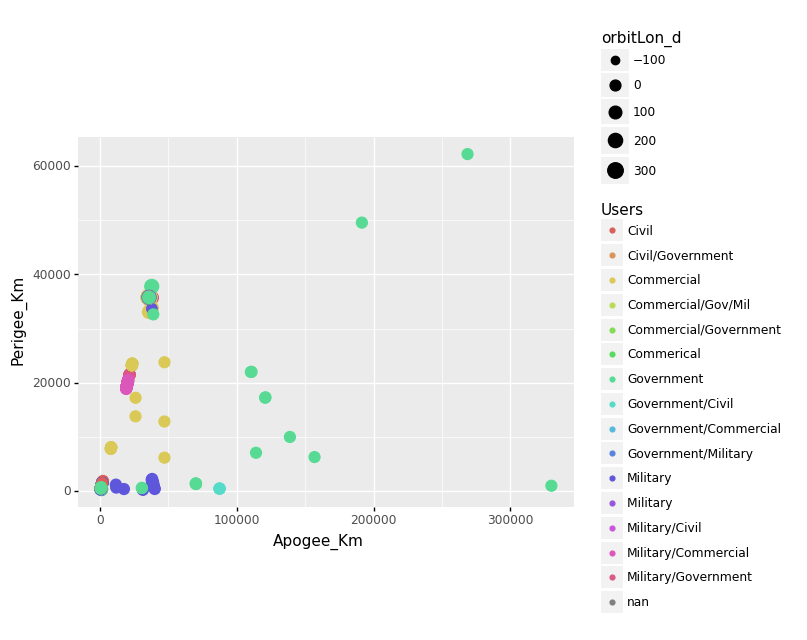

<ggplot: (311877256)>

In [21]:
ggplot(data, aes(x='Apogee_Km', y='Perigee_Km', 
    size = 'orbitLon_d', color = 'Users')) + geom_point()

#

/usr/local/Caskroom/miniconda/base/envs/bigdata/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_count : Removed 4 rows containing non-finite values.
/usr/local/Caskroom/miniconda/base/envs/bigdata/lib/python3.9/site-packages/plotnine/positions/position.py:204: PlotnineWarning: position_stack requires non-overlapping x intervals


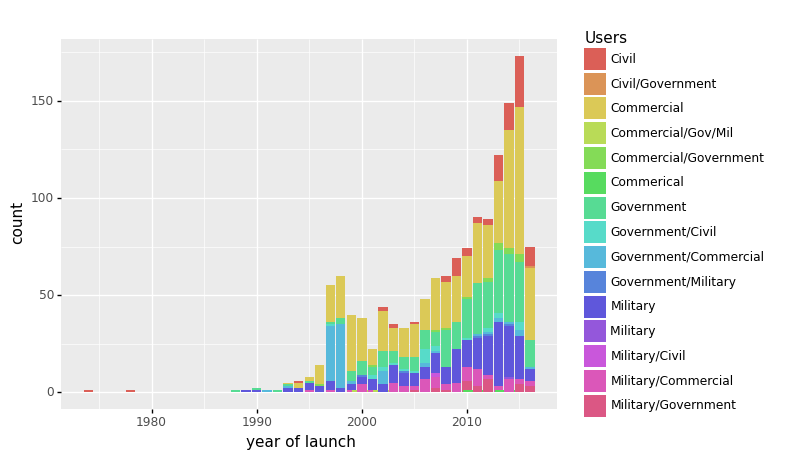

<ggplot: (311961899)>

In [22]:
ggplot(data, aes(x='year of launch', fill = 'Users')) + \
    geom_bar(stat = 'count')